In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("Lagomorpha_out_HKY_G5_iqtree.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n89          1.7204 ( 1.5980,  1.9456) ( 1.5863,  1.9193)  0.3329 (Jnode 174)\n',
 't_n90          0.4829 ( 0.4680,  0.4980) ( 0.4685,  0.4984)  0.0299 (Jnode 173)\n',
 't_n91          0.3155 ( 0.2807,  0.3481) ( 0.2806,  0.3481)  0.0674 (Jnode 172)\n',
 't_n92          0.3099 ( 0.2748,  0.3423) ( 0.2756,  0.3429)  0.0673 (Jnode 171)\n',
 't_n93          0.3027 ( 0.2682,  0.3352) ( 0.2700,  0.3369)  0.0669 (Jnode 170)\n',
 't_n94          0.2387 ( 0.2047,  0.2715) ( 0.2059,  0.2724)  0.0666 (Jnode 169)\n',
 't_n95          0.1379 ( 0.1142,  0.1627) ( 0.1135,  0.1615)  0.0480 (Jnode 168)\n',
 't_n96          0.1279 ( 0.1062,  0.1512) ( 0.1051,  0.1496)  0.0445 (Jnode 167)\n',
 't_n97          0.0468 ( 0.0286,  0.0698) ( 0.0274,  0.0676)  0.0402 (Jnode 166)\n',
 't_n98          0.1168 ( 0.0966,  0.1392) ( 0.0956,  0.1373)  0.0417 (Jnode 165)\n',
 't_n99          0.1091 ( 0.0893,  0.1316) ( 0.0883,  0.1301)  0.0418 (Jnode 164)\n',
 't_n100         0.0974 ( 0.0785,  0.1191) ( 0.0776,  

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    lower_ci_iqtree.append(float(line[3][:-1]))
    upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))
    
for line in mu_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_iqtree.append(float(line[1]))
    lower_ci_mu_iqtree.append(float(line[3][:-1]))
    upper_ci_mu_iqtree.append(float(line[4][:-1]))
    
for line in var_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_iqtree.append(float(line[1]))
    lower_ci_var_iqtree.append(float(line[3][:-1]))
    upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143',
 't_n144',
 't_n145',
 't_n146',
 't_n147',
 't_n148',
 't_n149',
 't_n150',
 't_n151',
 't_n152',
 't_n153',
 't_n154',
 't_n155',
 't_n156',
 't_n157',
 't_n158',
 't_n159',
 't_n160',
 't_n161',
 't_n162',
 't_n163',
 't_n164',
 't_n165',
 't_n166',
 't_n167',
 't_n168',
 't_n169',
 't_n170',
 't_n171',
 't_n172',
 't_n173',
 't_n174',
 't_n175']

In [6]:
posterior_mean_iqtree

[1.7204,
 0.4829,
 0.3155,
 0.3099,
 0.3027,
 0.2387,
 0.1379,
 0.1279,
 0.0468,
 0.1168,
 0.1091,
 0.0974,
 0.0777,
 0.0255,
 0.0194,
 0.0108,
 0.0065,
 0.0035,
 0.0205,
 0.0626,
 0.1091,
 0.0935,
 0.087,
 0.0497,
 0.039,
 0.0304,
 0.0151,
 0.0043,
 0.0043,
 0.0097,
 0.0088,
 0.0077,
 0.0073,
 0.0351,
 0.0612,
 0.1257,
 0.1174,
 0.0043,
 0.0987,
 0.0269,
 0.048,
 0.0921,
 0.2916,
 0.2611,
 0.2685,
 0.2422,
 0.1209,
 0.282,
 0.1221,
 0.085,
 0.0587,
 0.1103,
 0.1683,
 0.1634,
 0.1328,
 0.1244,
 0.0724,
 0.0604,
 0.0556,
 0.0446,
 0.0124,
 0.0104,
 0.009,
 0.0132,
 0.0178,
 0.0016,
 0.0089,
 0.1218,
 0.0907,
 0.0689,
 0.0607,
 0.0553,
 0.0428,
 0.0198,
 0.0502,
 0.0817,
 0.1296,
 0.1134,
 0.0708,
 0.0608,
 0.0068,
 0.031,
 0.0376,
 0.016,
 0.0954,
 0.6826,
 0.133]

In [7]:
lower_ci_iqtree

[1.598,
 0.468,
 0.2807,
 0.2748,
 0.2682,
 0.2047,
 0.1142,
 0.1062,
 0.0286,
 0.0966,
 0.0893,
 0.0785,
 0.0624,
 0.0162,
 0.0115,
 0.0056,
 0.0015,
 0.0009,
 0.0117,
 0.0408,
 0.0897,
 0.0765,
 0.0702,
 0.038,
 0.0293,
 0.0224,
 0.0086,
 0.0025,
 0.0,
 0.0064,
 0.0058,
 0.0051,
 0.0047,
 0.0239,
 0.0442,
 0.0952,
 0.0878,
 0.0005,
 0.0717,
 0.0147,
 0.0297,
 0.0375,
 0.2551,
 0.2167,
 0.2243,
 0.1889,
 0.0704,
 0.2377,
 0.0862,
 0.0564,
 0.036,
 0.0524,
 0.1307,
 0.1273,
 0.1025,
 0.095,
 0.0509,
 0.0418,
 0.0383,
 0.0297,
 0.0068,
 0.0056,
 0.0048,
 0.0074,
 0.0093,
 0.0003,
 0.0039,
 0.0922,
 0.0672,
 0.0498,
 0.0436,
 0.0391,
 0.0292,
 0.0105,
 0.0339,
 0.0591,
 0.0976,
 0.0835,
 0.046,
 0.0372,
 0.0019,
 0.0149,
 0.021,
 0.0068,
 0.0674,
 0.2633,
 0.0517]

In [8]:
upper_ci_iqtree

[1.9456,
 0.498,
 0.3481,
 0.3423,
 0.3352,
 0.2715,
 0.1627,
 0.1512,
 0.0698,
 0.1392,
 0.1316,
 0.1191,
 0.0963,
 0.0373,
 0.0298,
 0.0179,
 0.0132,
 0.0076,
 0.0318,
 0.0862,
 0.1303,
 0.1127,
 0.1058,
 0.0629,
 0.0504,
 0.0401,
 0.0234,
 0.0068,
 0.0149,
 0.0139,
 0.0125,
 0.0111,
 0.0105,
 0.0491,
 0.0815,
 0.1543,
 0.1454,
 0.0121,
 0.1273,
 0.0443,
 0.0712,
 0.1362,
 0.3258,
 0.3023,
 0.3093,
 0.2889,
 0.1847,
 0.3208,
 0.1646,
 0.1188,
 0.0881,
 0.1934,
 0.2237,
 0.2186,
 0.1825,
 0.1715,
 0.105,
 0.0881,
 0.0815,
 0.0663,
 0.0219,
 0.0187,
 0.0163,
 0.0223,
 0.0305,
 0.0041,
 0.0173,
 0.168,
 0.1266,
 0.098,
 0.0862,
 0.0787,
 0.0625,
 0.0329,
 0.0735,
 0.1148,
 0.1787,
 0.1577,
 0.1046,
 0.0925,
 0.0156,
 0.0555,
 0.0646,
 0.0318,
 0.1331,
 1.3033,
 0.1689]

In [9]:
file_mcmctree = open("Lagomotpha_out_baseml_HKY_G5.txt", "r")
lines1 = file_mcmctree.readlines()
file_mcmctree.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    lower_ci_baseml.append(float(line[3][:-1]))
    upper_ci_baseml.append(float(line[4][:-1]))
    
for line in mu_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_baseml.append(float(line[1]))
    lower_ci_mu_baseml.append(float(line[3][:-1]))
    upper_ci_mu_baseml.append(float(line[4][:-1]))
    
for line in var_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_baseml.append(float(line[1]))
    lower_ci_var_baseml.append(float(line[3][:-1]))
    upper_ci_var_baseml.append(float(line[4][:-1]))

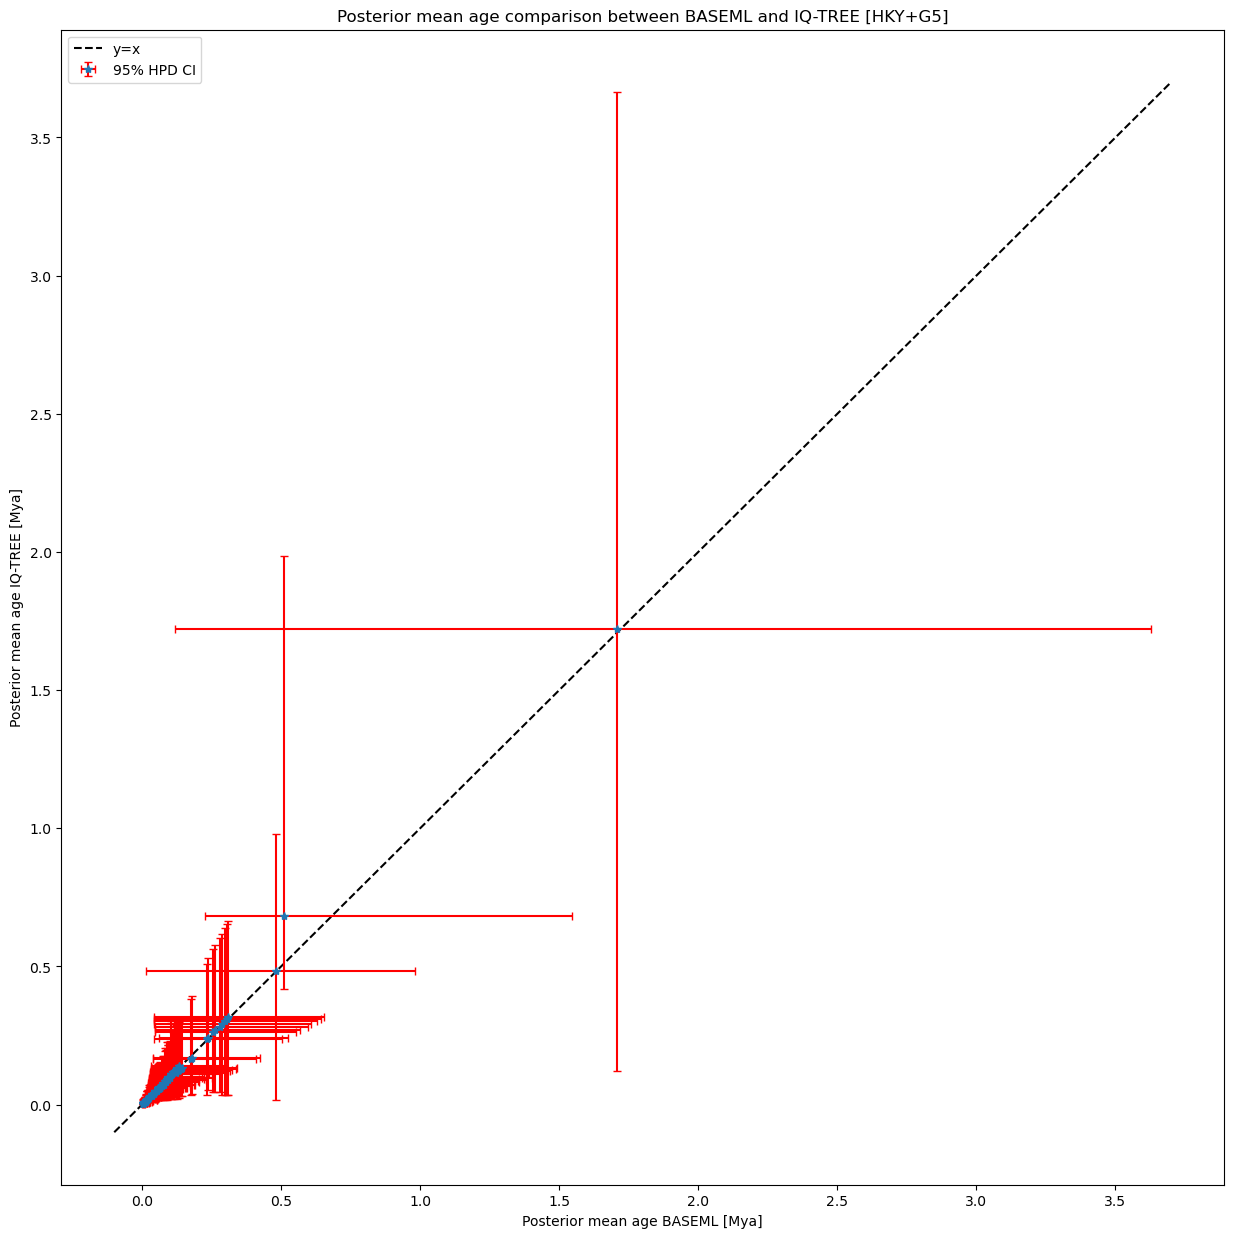

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot([-0.1,3.7], 
        [-0.1, 3.7], 
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age BASEML [Mya]')
ax.set_ylabel('Posterior mean age IQ-TREE [Mya]')
ax.set_title('Posterior mean age comparison between BASEML and IQ-TREE [HKY+G5]')
ax.legend()

# Show plot
# plt.show()
plt.savefig('/home/piyumal/PHD/phylogenetics/code/TreeMatching2/date_testing/Lagomorpha/Lagomorpha_posterior_mean_age_comparison_HKY_G5.png')

In [11]:
posterior_mean_baseml

[1.7092,
 0.4834,
 0.3107,
 0.3049,
 0.2976,
 0.2341,
 0.1339,
 0.1241,
 0.045,
 0.1131,
 0.1061,
 0.0942,
 0.0746,
 0.0244,
 0.0184,
 0.0101,
 0.0061,
 0.0033,
 0.0197,
 0.0602,
 0.1058,
 0.0905,
 0.0842,
 0.0476,
 0.0374,
 0.0292,
 0.0148,
 0.0042,
 0.0043,
 0.0091,
 0.0083,
 0.0073,
 0.0069,
 0.034,
 0.059,
 0.1203,
 0.1122,
 0.0038,
 0.0936,
 0.0254,
 0.0451,
 0.0883,
 0.2857,
 0.2561,
 0.2637,
 0.2377,
 0.1193,
 0.2787,
 0.1205,
 0.0838,
 0.0581,
 0.1058,
 0.1802,
 0.175,
 0.142,
 0.1336,
 0.0777,
 0.0655,
 0.06,
 0.0479,
 0.0134,
 0.0113,
 0.0097,
 0.0141,
 0.0195,
 0.0017,
 0.0127,
 0.1309,
 0.0945,
 0.0717,
 0.0633,
 0.0575,
 0.0445,
 0.0206,
 0.0522,
 0.0845,
 0.1403,
 0.1228,
 0.0747,
 0.0641,
 0.0073,
 0.0342,
 0.0418,
 0.0176,
 0.1022,
 0.5106,
 0.1245]

In [12]:
posterior_mean_iqtree

[1.7204,
 0.4829,
 0.3155,
 0.3099,
 0.3027,
 0.2387,
 0.1379,
 0.1279,
 0.0468,
 0.1168,
 0.1091,
 0.0974,
 0.0777,
 0.0255,
 0.0194,
 0.0108,
 0.0065,
 0.0035,
 0.0205,
 0.0626,
 0.1091,
 0.0935,
 0.087,
 0.0497,
 0.039,
 0.0304,
 0.0151,
 0.0043,
 0.0043,
 0.0097,
 0.0088,
 0.0077,
 0.0073,
 0.0351,
 0.0612,
 0.1257,
 0.1174,
 0.0043,
 0.0987,
 0.0269,
 0.048,
 0.0921,
 0.2916,
 0.2611,
 0.2685,
 0.2422,
 0.1209,
 0.282,
 0.1221,
 0.085,
 0.0587,
 0.1103,
 0.1683,
 0.1634,
 0.1328,
 0.1244,
 0.0724,
 0.0604,
 0.0556,
 0.0446,
 0.0124,
 0.0104,
 0.009,
 0.0132,
 0.0178,
 0.0016,
 0.0089,
 0.1218,
 0.0907,
 0.0689,
 0.0607,
 0.0553,
 0.0428,
 0.0198,
 0.0502,
 0.0817,
 0.1296,
 0.1134,
 0.0708,
 0.0608,
 0.0068,
 0.031,
 0.0376,
 0.016,
 0.0954,
 0.6826,
 0.133]

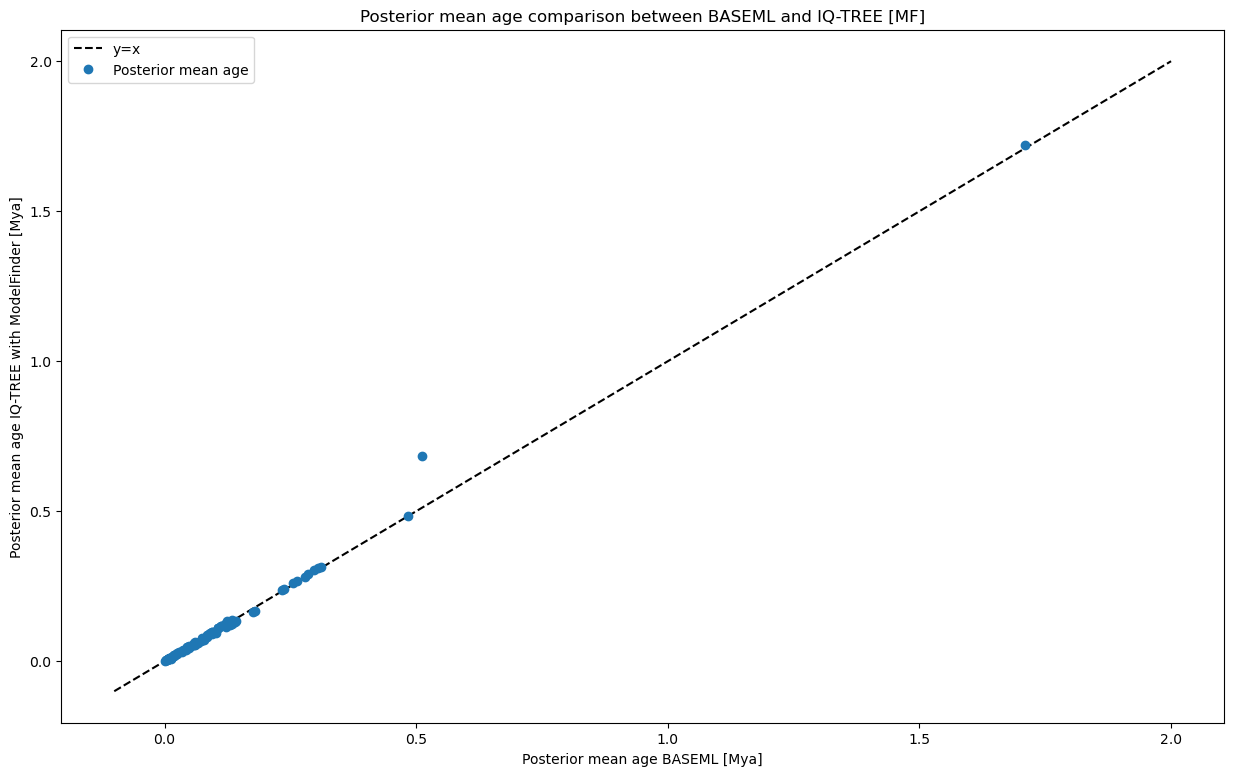

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot([-0.1,2.0], 
        [-0.1, 2.0], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age BASEML [Mya]')
ax.set_ylabel('Posterior mean age IQ-TREE with ModelFinder [Mya]')
ax.set_title('Posterior mean age comparison between BASEML and IQ-TREE [MF]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('/home/piyumal/PHD/phylogenetics/code/TreeMatching2/date_testing/Lagomorpha/Lagomorpha_posterior_mean_age_comparison_HKY_G5_scatter.png')